# **Plotting Residuals with Respect to '*divSchemes*'**

This notebook is for comparison of various divergence schemes for residuals. Two turbulence models ('*kOmegaSST*' and '*SpalartAllmaras*') without wall functions are to be investigated. The procedures are almost the same with '*PlotResiduals.ipynb*', and thus the detail explanation can be referred to in that notebook. However, only the residual limit of *1e-5* is investigated here.

In [1]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# increase dpi and use latex rendering
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)

# Set macro for paths
run = "../run/"
ds = "./output/divSchemes/"
!mkdir -p output
!mkdir -p output/divSchemes

## **1. Set Related Variables in Accordance with the Case Data**

In [2]:
model = "kOmegaSST"
model_sa = "SpalartAllmaras"
yp = ['0.05', '1', '2', '5', '10', '30', '50', '100']
fixed_res = '1e-5'
divSchemes = ['limitedLinear', 'linear', 'linearUpwind', 'upwind']

## **2. Load Data**

### 2-1. '*kOmegaSST*' Model

In [3]:
solverInfo_path_ds = [run + 'turbulentFlatPlate_noWallFunc_divSchemes/UdivSchemes/yplus_{}/{}/solverInfo_{}_{}_{}_{}.csv'.format(yp[j], divSchemes[i], model, yp[j], fixed_res, divSchemes[i]) for j in range(len(yp)) for i in range(len(divSchemes))]
solverInfo_data_ds = [pd.read_csv(solverInfo_path_ds[i + len(divSchemes)*j], delim_whitespace=True, skiprows = 1) for j in range(len(yp)) for i in range(len(divSchemes))]
solverInfo_data_ds[0].head()

,Time,U_solver,Ux_initial,Ux_final,Ux_iters,Uy_initial,Uy_final,Uy_iters,U_converged,p_solver,p_initial,p_final,p_iters,p_converged
0,1,smoothSolver,1.000000,0.053705,2,1.000000,0.081337,1,False,GAMG,1.000000,0.053032,13,True
1,2,smoothSolver,0.052019,0.003208,4,0.156591,0.012124,2,False,GAMG,0.002407,0.000152,1,True
2,3,smoothSolver,0.019888,0.001340,5,0.099018,0.007756,2,False,GAMG,0.007075,0.000621,1,True
3,4,smoothSolver,0.012576,0.001077,5,0.084959,0.006263,2,False,GAMG,0.011210,0.000875,1,True
4,5,smoothSolver,0.009616,0.000925,5,0.082701,0.005551,2,False,GAMG,0.009379,0.000674,1,True


### 2-2. '*SpalartAllmaras*' Model

In [4]:
solverInfo_path_ds_sa = [run + 'turbulentFlatPlate_noWallFunc_divSchemes_SA/UdivSchemes/yplus_{}/{}/solverInfo_{}_{}_{}_{}.csv'.format(yp[j], divSchemes[i], model_sa, yp[j], fixed_res, divSchemes[i]) for j in range(len(yp)) for i in range(len(divSchemes))]
solverInfo_data_ds_sa = [pd.read_csv(solverInfo_path_ds_sa[i + len(divSchemes)*j], delim_whitespace=True, skiprows = 1) for j in range(len(yp)) for i in range(len(divSchemes))]
solverInfo_data_ds_sa[0].head()

,Time,U_solver,Ux_initial,Ux_final,Ux_iters,Uy_initial,Uy_final,Uy_iters,U_converged,p_solver,p_initial,p_final,p_iters,p_converged
0,1,smoothSolver,1.000000,0.068403,3,1.000000,0.068885,2,False,GAMG,1.000000,0.054067,13,True
1,2,smoothSolver,0.088638,0.006938,3,0.155588,0.012847,2,False,GAMG,0.002421,0.000151,1,True
2,3,smoothSolver,0.027786,0.002685,4,0.101035,0.008377,2,False,GAMG,0.007210,0.000680,1,True
3,4,smoothSolver,0.015766,0.001292,5,0.081383,0.006444,2,False,GAMG,0.010489,0.000788,1,True
4,5,smoothSolver,0.011865,0.001113,5,0.081368,0.005866,2,False,GAMG,0.009751,0.000685,1,True


## **3. Import of Initial Residual for *'U<sub>x</sub>'*, *'U<sub>y</sub>'*, and *'p'***

### 3-1. '*kOmegaSST*' Model

In [5]:
Ux_init_res_ds = [solverInfo_data_ds[i + len(divSchemes)*j]['Ux_initial'] for j in range(len(yp)) for i in range(len(divSchemes))]
Uy_init_res_ds = [solverInfo_data_ds[i + len(divSchemes)*j]['Uy_initial'] for j in range(len(yp)) for i in range(len(divSchemes))]
p_init_res_ds = [solverInfo_data_ds[i + len(divSchemes)*j]['p_initial'] for j in range(len(yp)) for i in range(len(divSchemes))]
t_ds = [solverInfo_data_ds[i + len(divSchemes)*j]['Time'] for j in range(len(yp)) for i in range(len(divSchemes))]

### 3-2. '*SpalartAllmaras*' Model

In [6]:
Ux_init_res_ds_sa = [solverInfo_data_ds_sa[i + len(divSchemes)*j]['Ux_initial'] for j in range(len(yp)) for i in range(len(divSchemes))]
Uy_init_res_ds_sa = [solverInfo_data_ds_sa[i + len(divSchemes)*j]['Uy_initial'] for j in range(len(yp)) for i in range(len(divSchemes))]
p_init_res_ds_sa = [solverInfo_data_ds_sa[i + len(divSchemes)*j]['p_initial'] for j in range(len(yp)) for i in range(len(divSchemes))]
t_ds_sa = [solverInfo_data_ds_sa[i + len(divSchemes)*j]['Time'] for j in range(len(yp)) for i in range(len(divSchemes))]

## **4. Plot**

As seen below, '*limitedLinear*' scheme is always difficult to converge, whereas the other schemes relatively well converge.

### 4-1. '*kOmegaSST*' Model

<ipython-input-7-e6b9e3616974>:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig3, ax3 = plt.subplots(1, 1, figsize=(8, 3))


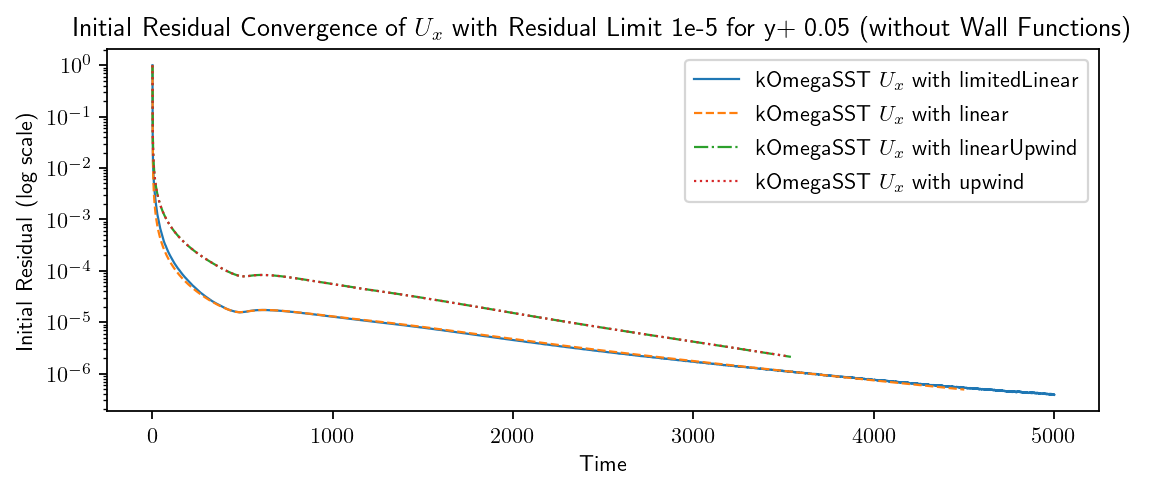

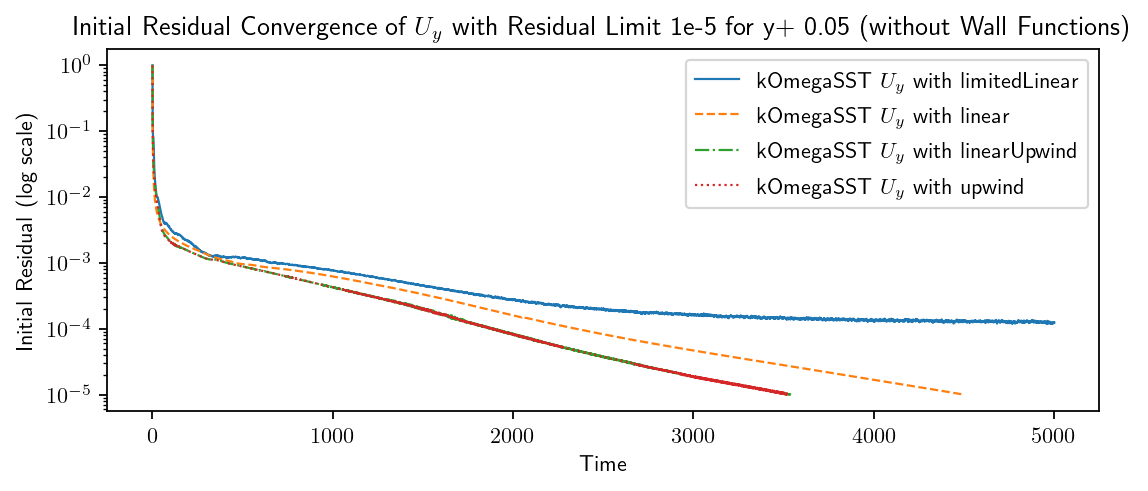

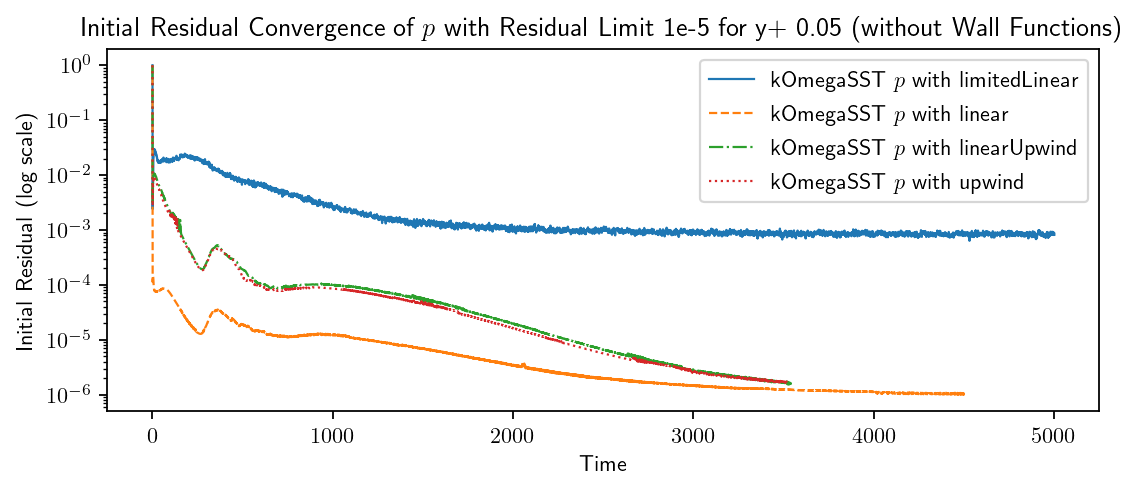

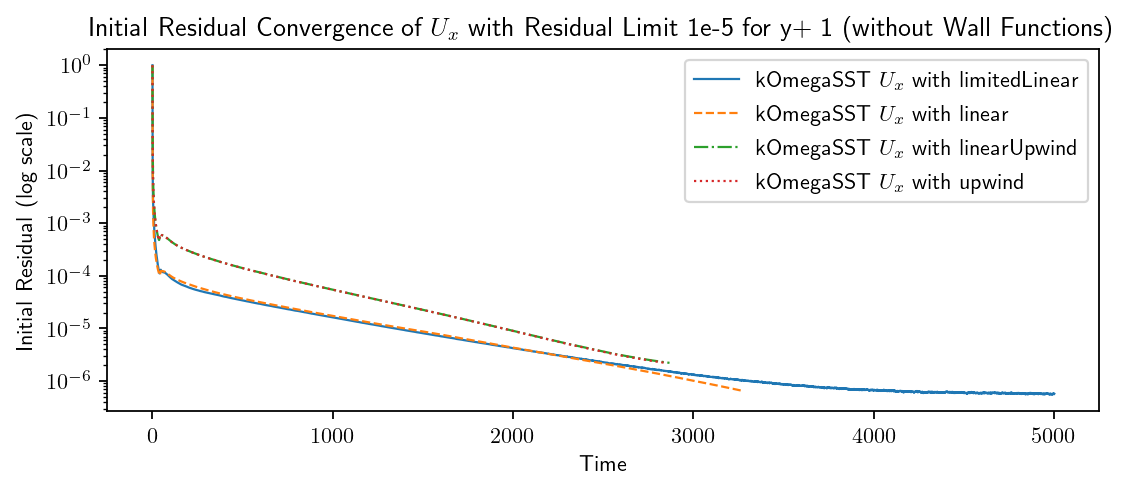

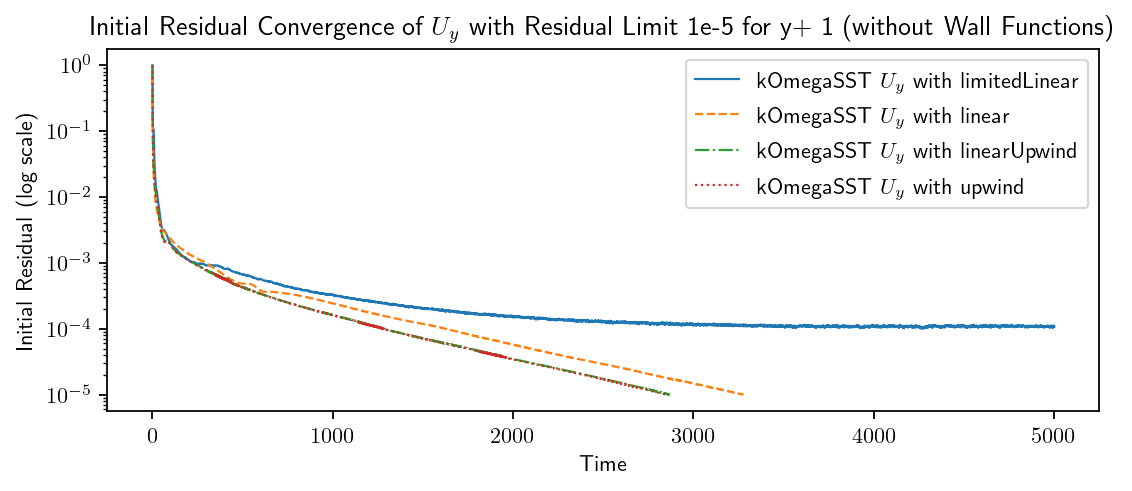

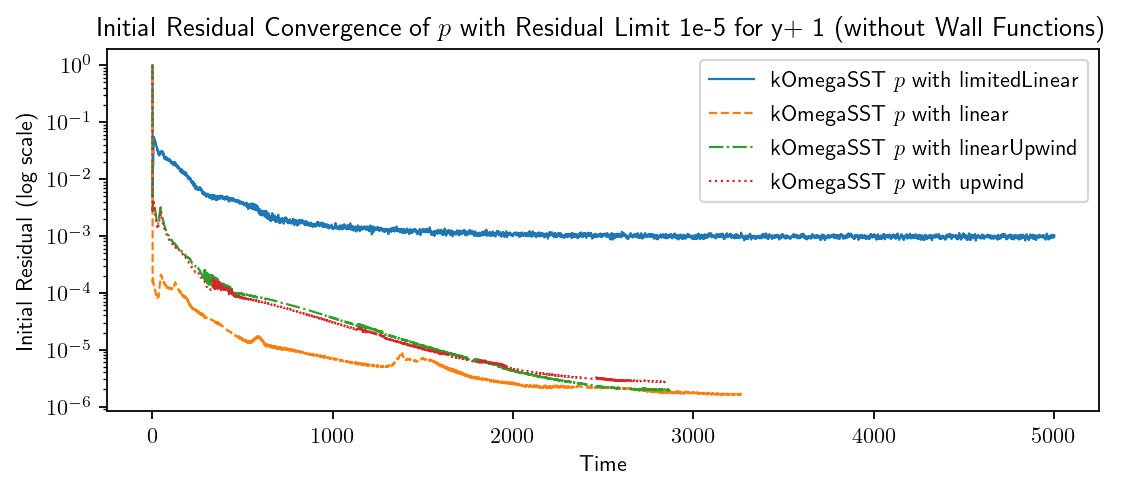

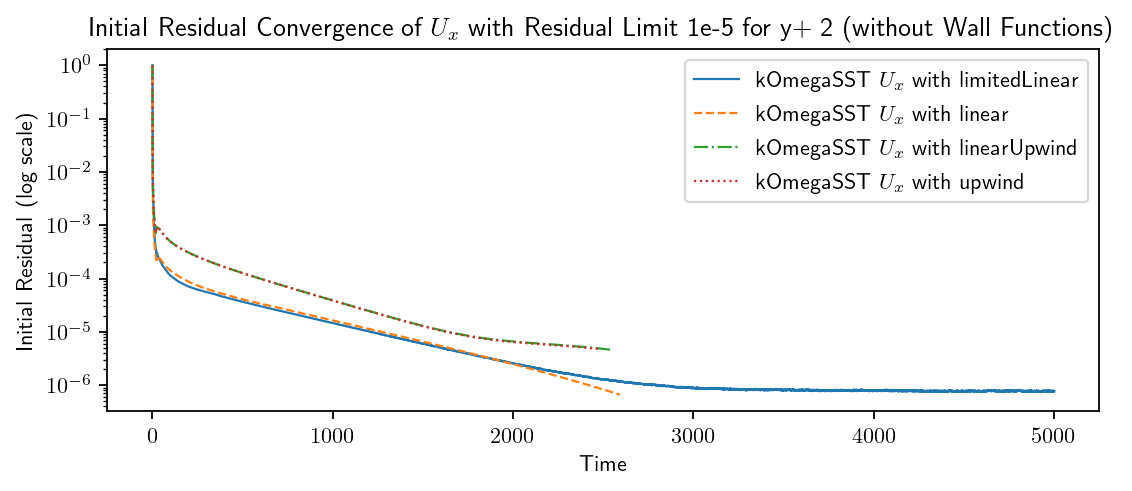

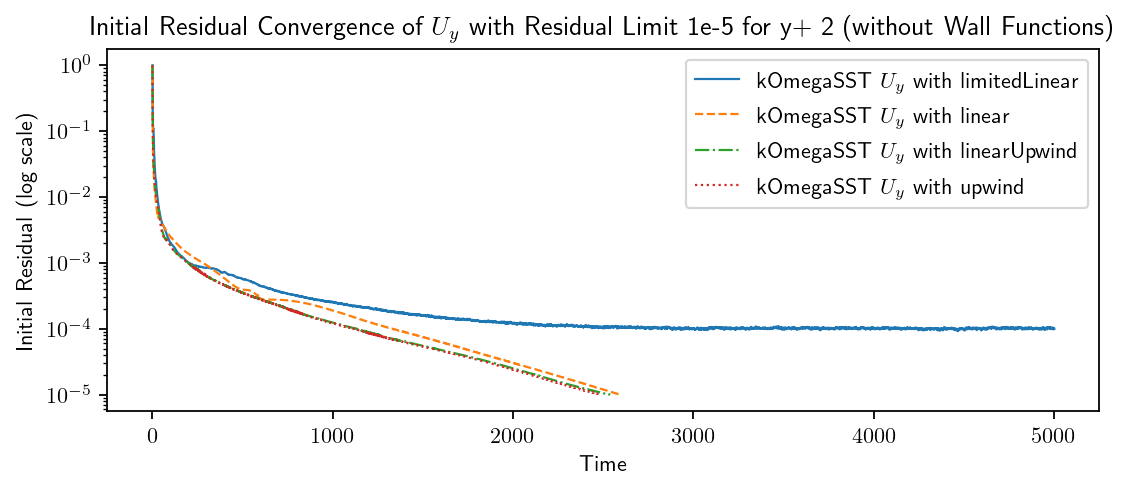

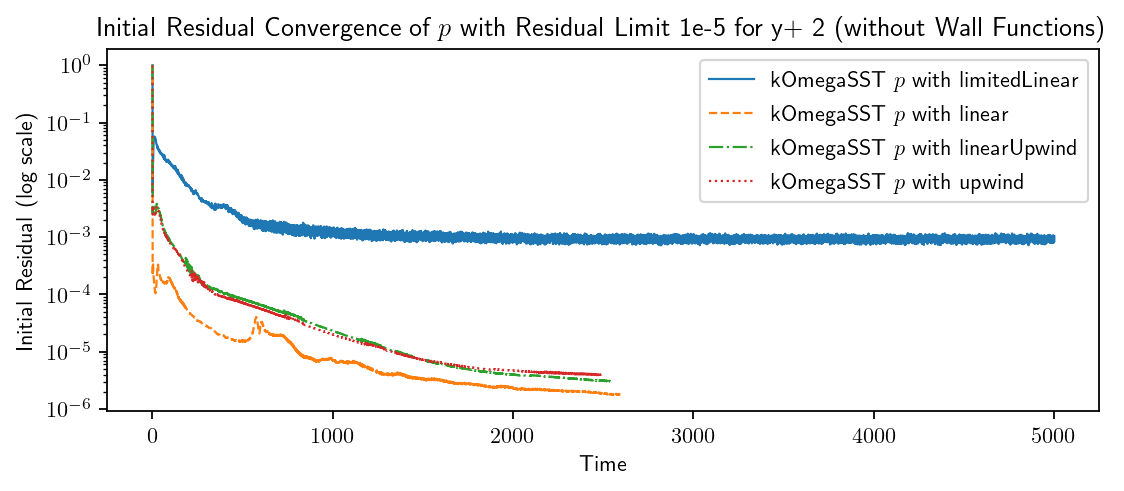

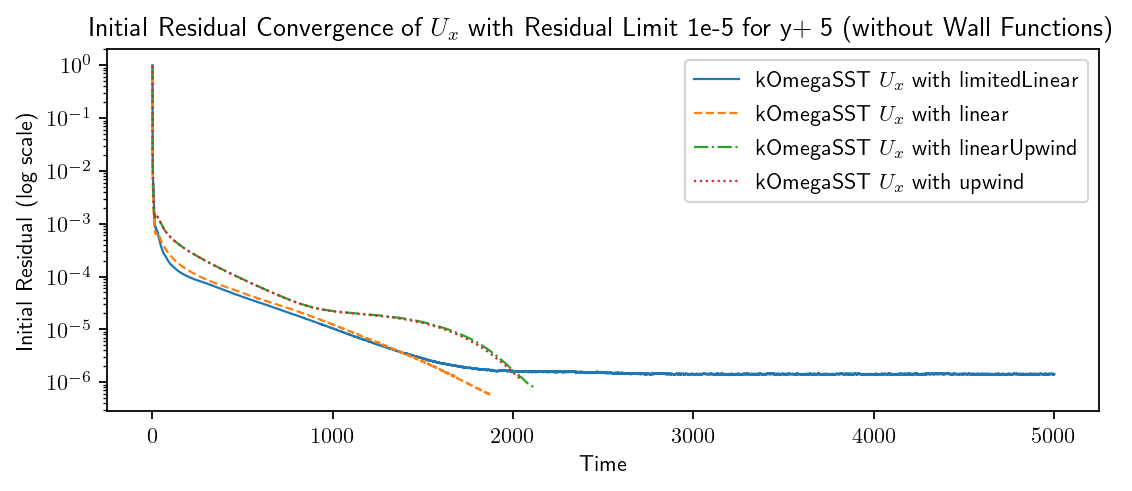

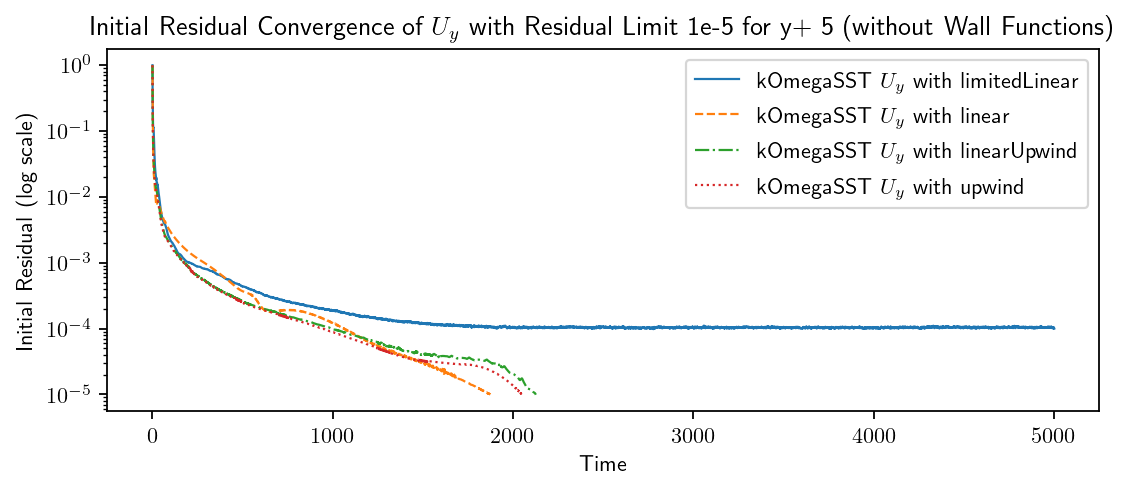

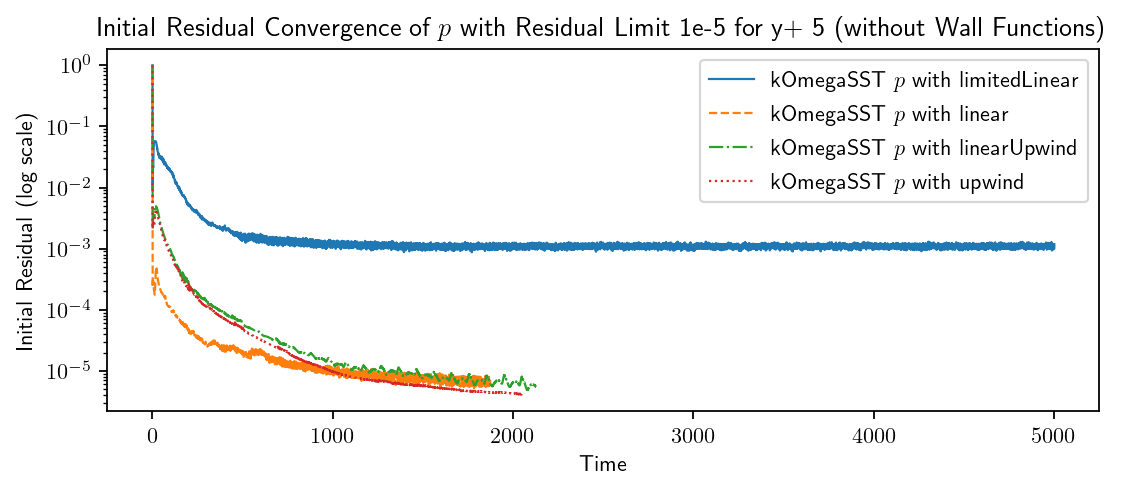

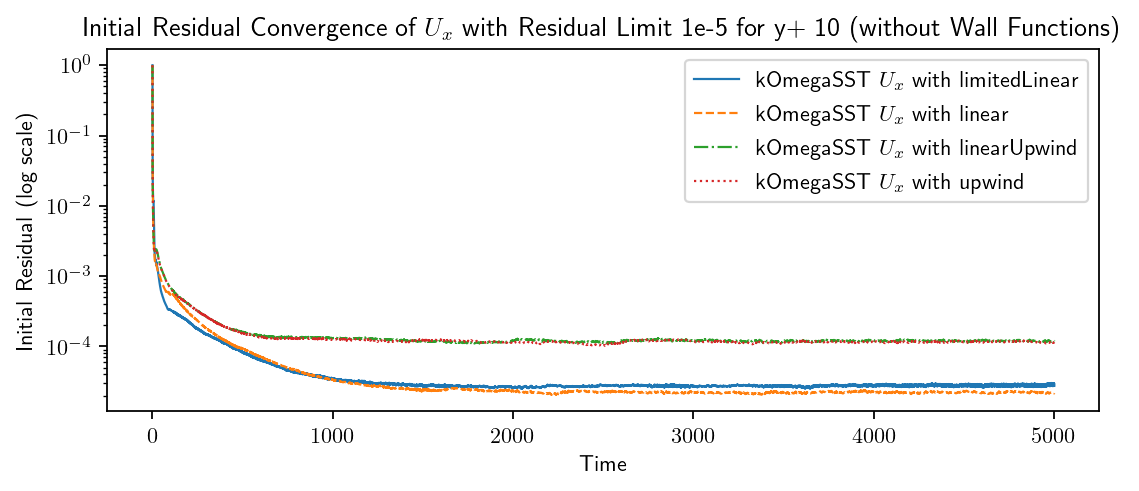

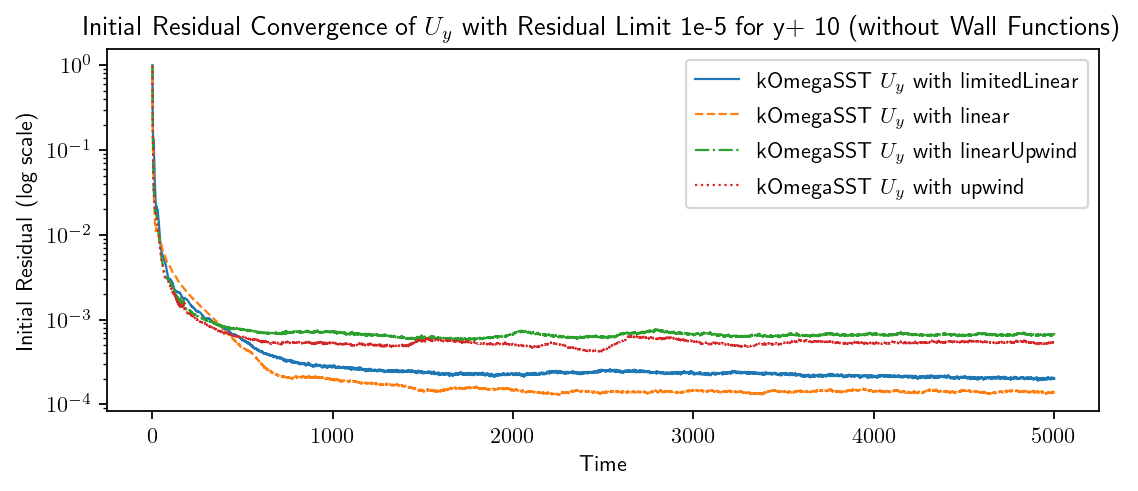

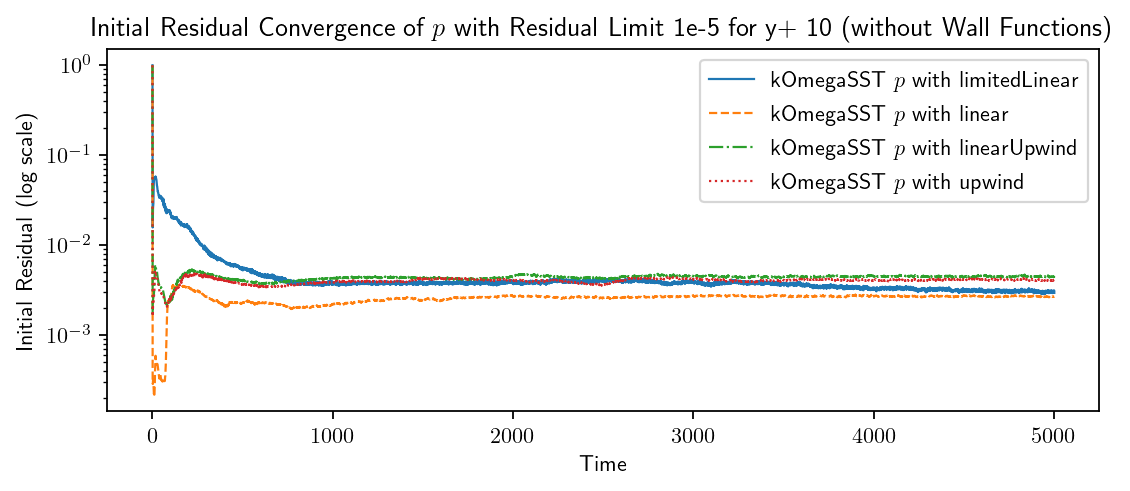

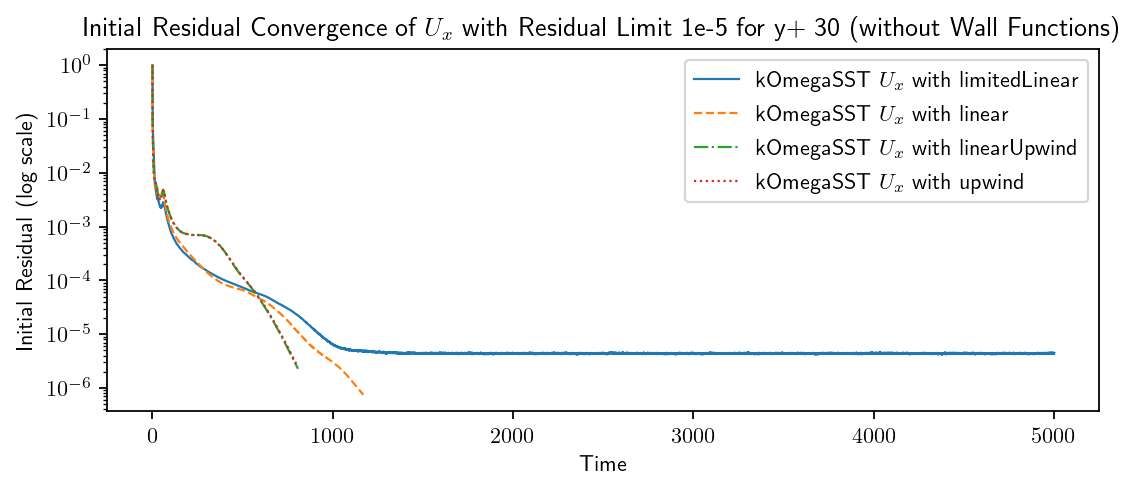

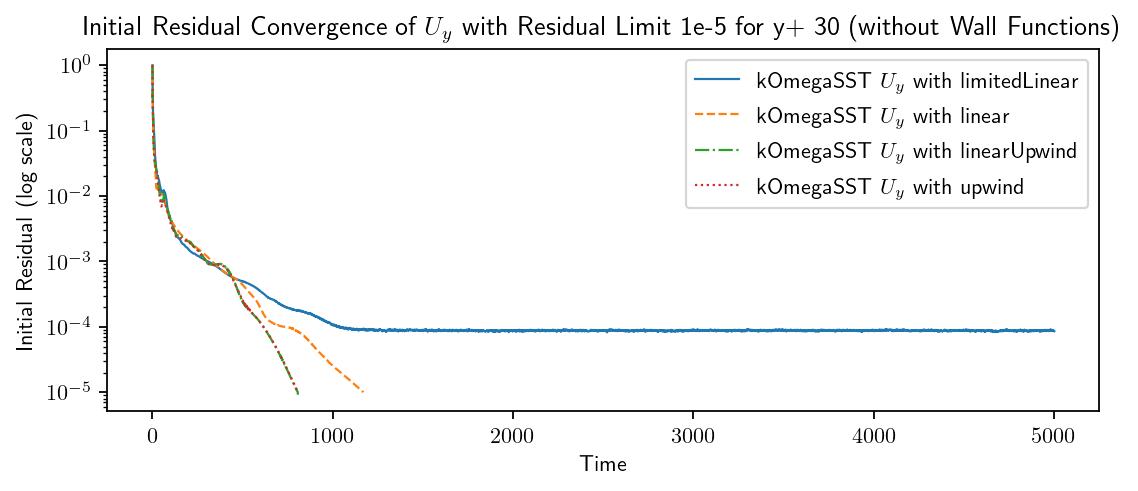

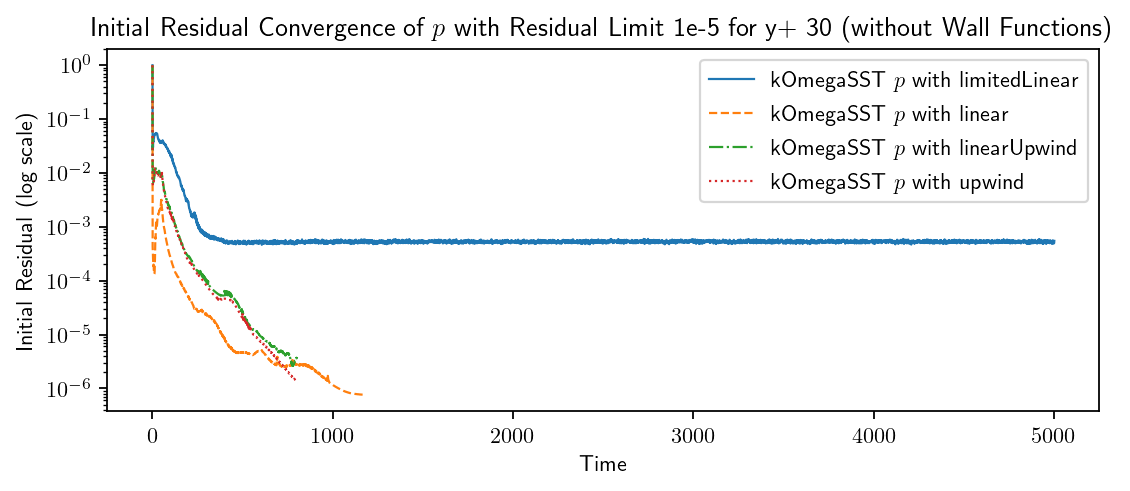

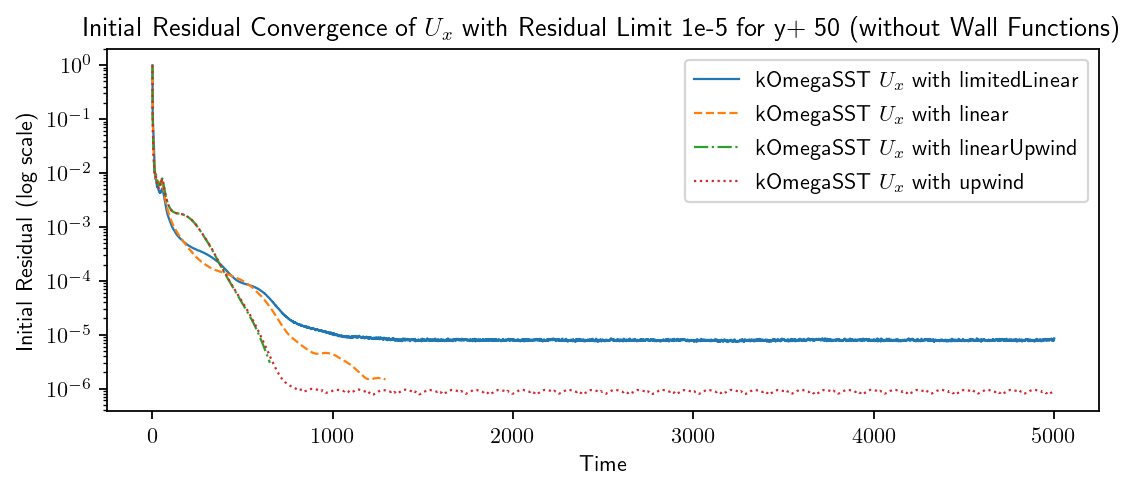

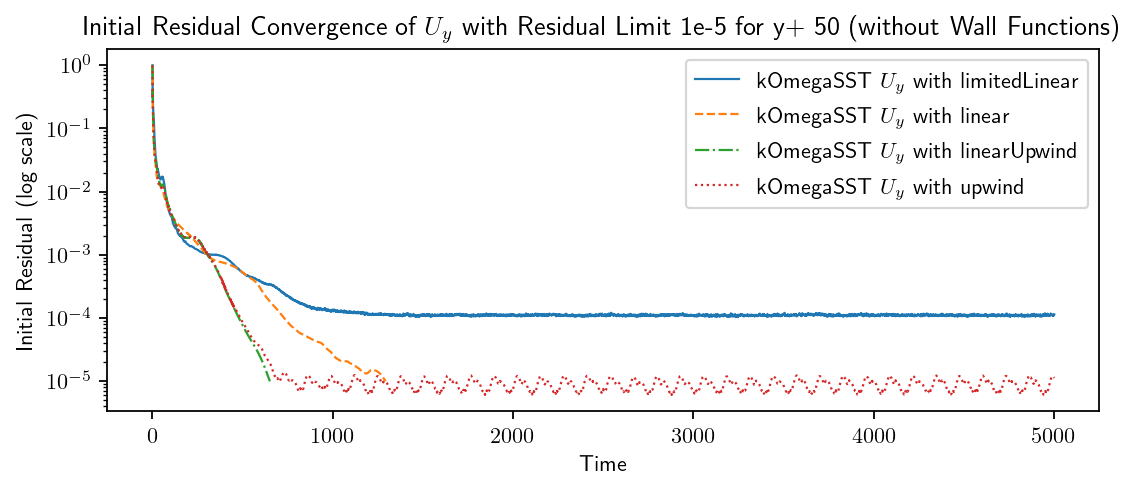

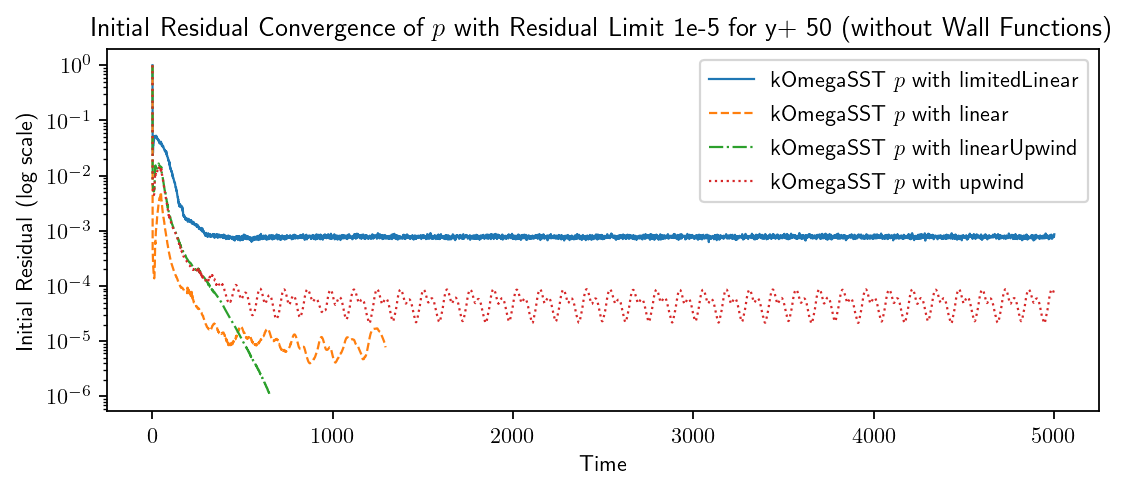

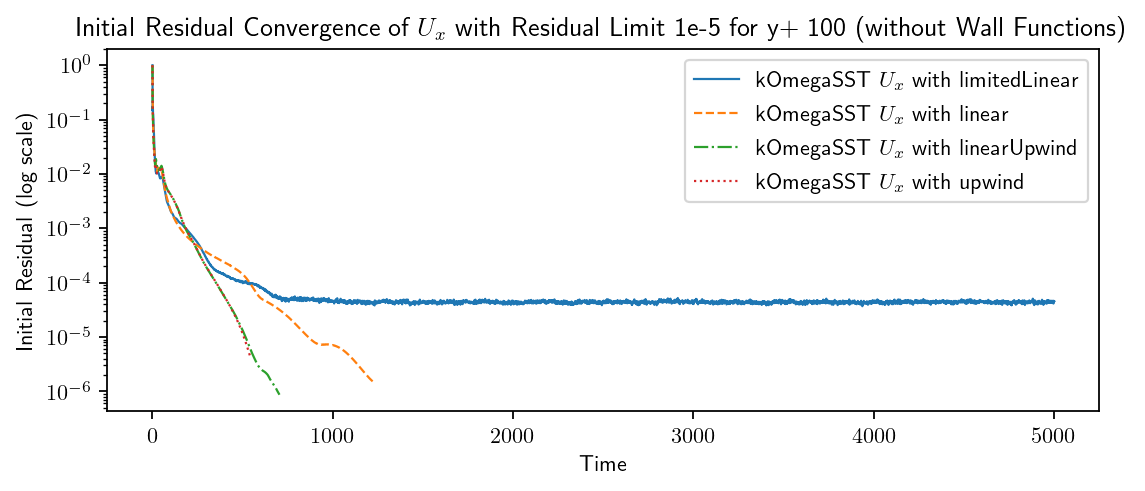

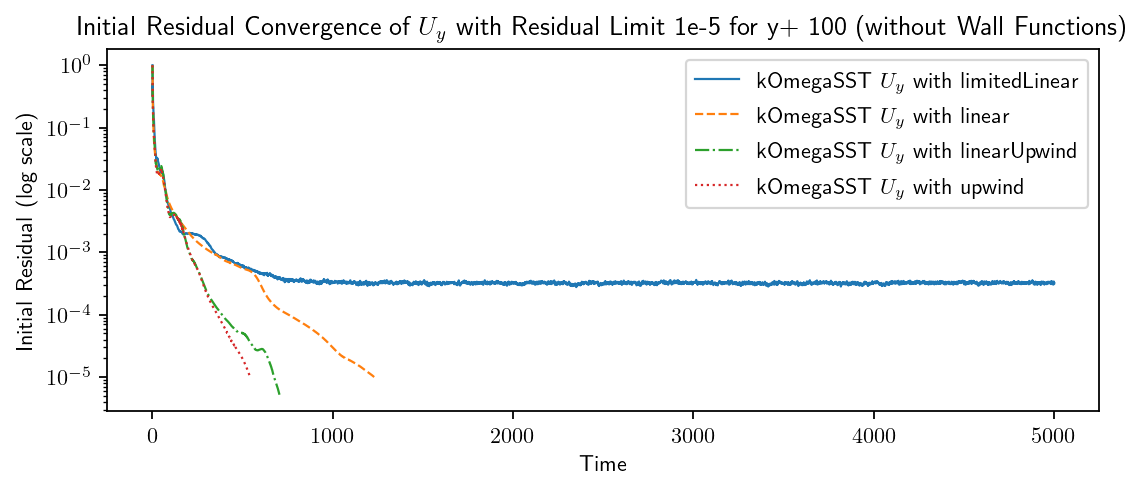

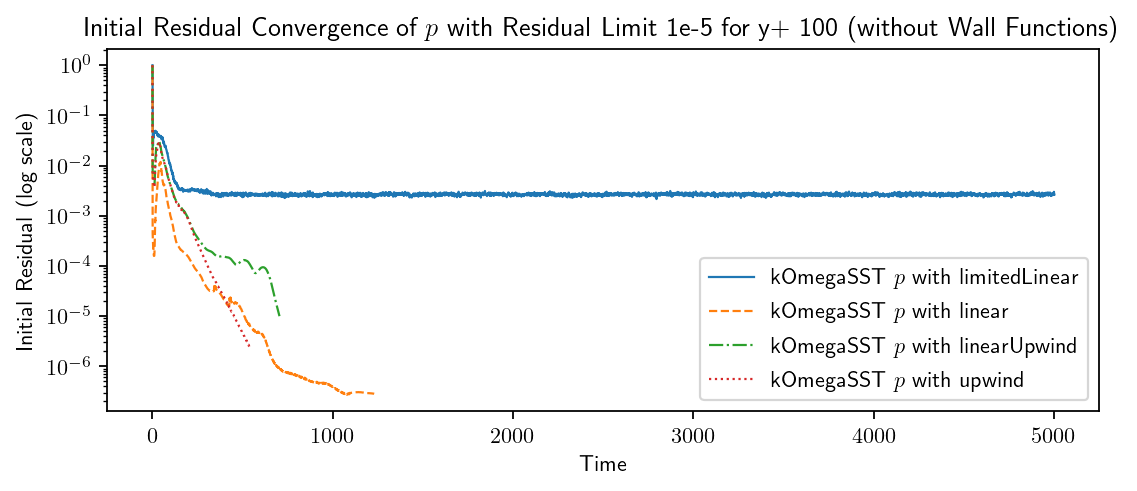

In [7]:
style = ["-", "--", "-.", ":"]
lw = 1.0
for j in range(len(yp)):
    fig, ax = plt.subplots(1, 1, figsize=(8, 3))
    for i in range(len(divSchemes)):
        plt.yscale("log")
        plt.grid()
        plt.title("Initial Residual Convergence of $U_x$ with Residual Limit 1e-5 for y+ {} (without Wall Functions)".format(yp[j]))
        ax.set_xlabel("Time")
        ax.set_ylabel("Initial Residual (log scale)")
        ax.plot(t_ds[i + len(divSchemes)*j], Ux_init_res_ds[i + len(divSchemes)*j], c = "C{:d}".format(i), ls = style[i], label = "{} $U_x$ with {}".format(model, divSchemes[i]), lw = lw)
        ax.legend()
    plt.savefig(ds + "solverInfo_yp{}_{}_Ux_noWallFunc_divSchemes.pdf".format(yp[j], model), bbox_inches="tight")
    fig2, ax2 = plt.subplots(1, 1, figsize=(8, 3))
    for k in range(len(divSchemes)):
        plt.yscale("log")
        plt.grid()
        plt.title("Initial Residual Convergence of $U_y$ with Residual Limit 1e-5 for y+ {} (without Wall Functions)".format(yp[j]))
        ax2.set_xlabel("Time")
        ax2.set_ylabel("Initial Residual (log scale)")
        ax2.plot(t_ds[k + len(divSchemes)*j], Uy_init_res_ds[k + len(divSchemes)*j], c = "C{:d}".format(k), ls = style[k], label = "{} $U_y$ with {}".format(model, divSchemes[k]), lw = lw)
        ax2.legend()
    plt.savefig(ds + "solverInfo_yp{}_{}_Uy_noWallFunc_divSchemes.pdf".format(yp[j], model), bbox_inches="tight")
    fig3, ax3 = plt.subplots(1, 1, figsize=(8, 3))
    for l in range(len(divSchemes)):
        plt.yscale("log")
        plt.grid()
        plt.title("Initial Residual Convergence of $p$ with Residual Limit 1e-5 for y+ {} (without Wall Functions)".format(yp[j]))
        ax3.set_xlabel("Time")
        ax3.set_ylabel("Initial Residual (log scale)")
        ax3.plot(t_ds[l + len(divSchemes)*j], p_init_res_ds[l + len(divSchemes)*j], c = "C{:d}".format(l), ls = style[l], label = "{} $p$ with {}".format(model, divSchemes[l]), lw = lw)
        ax3.legend()
    plt.savefig(ds + "solverInfo_yp{}_{}_p_noWallFunc_divSchemes.pdf".format(yp[j], model), bbox_inches="tight")

### 4-2. '*SpalartAllmaras*' Model

<ipython-input-8-f8f98629e9df>:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig6, ax6 = plt.subplots(1, 1, figsize=(8, 3))


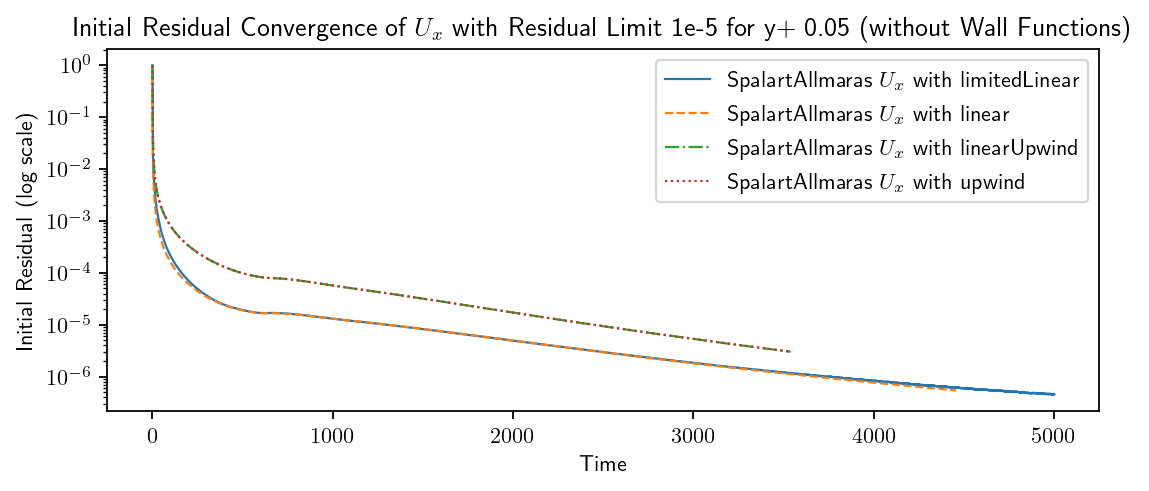

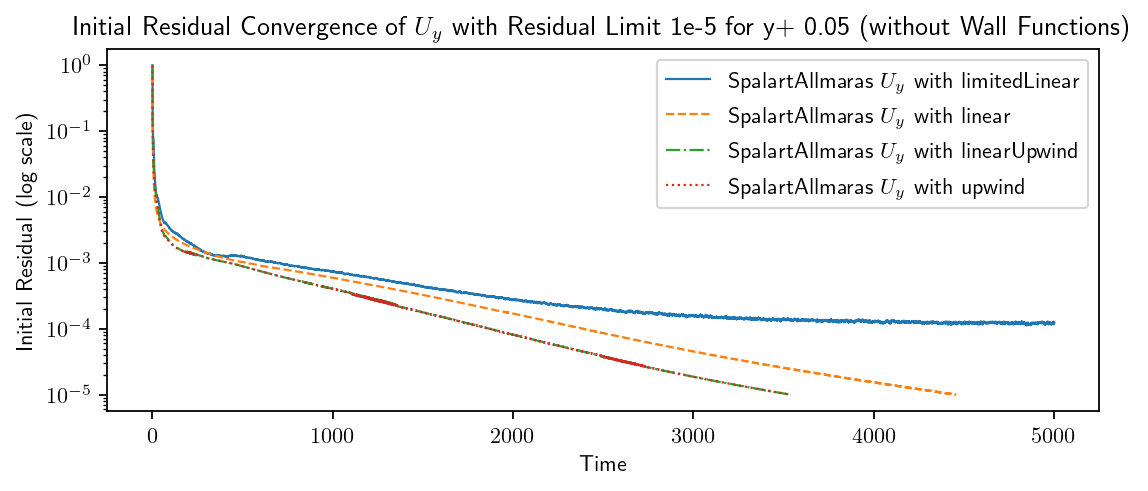

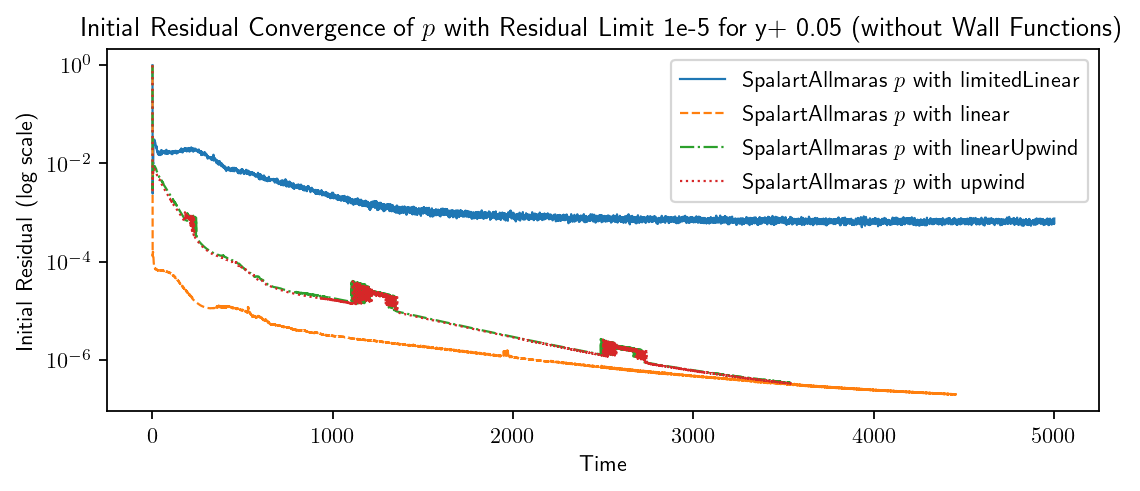

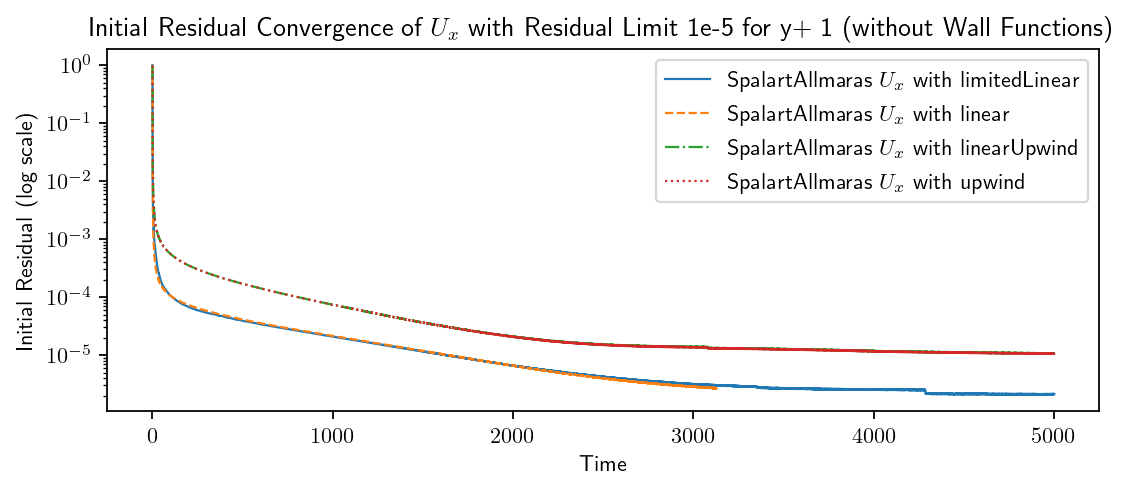

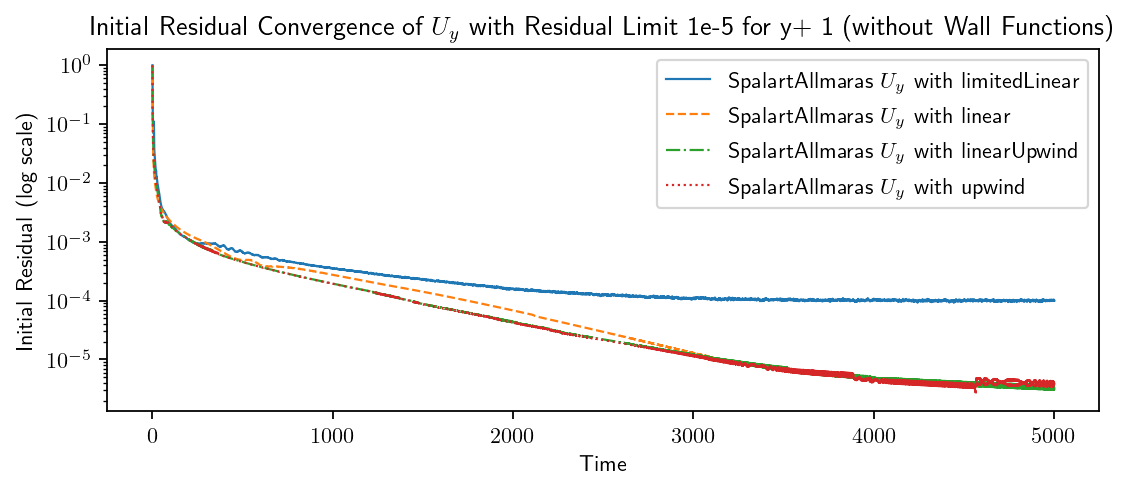

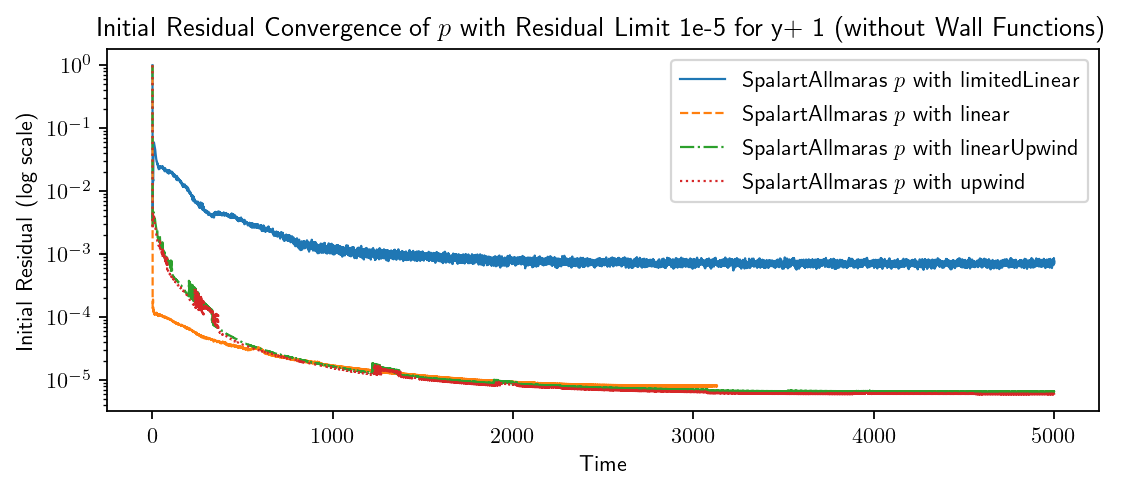

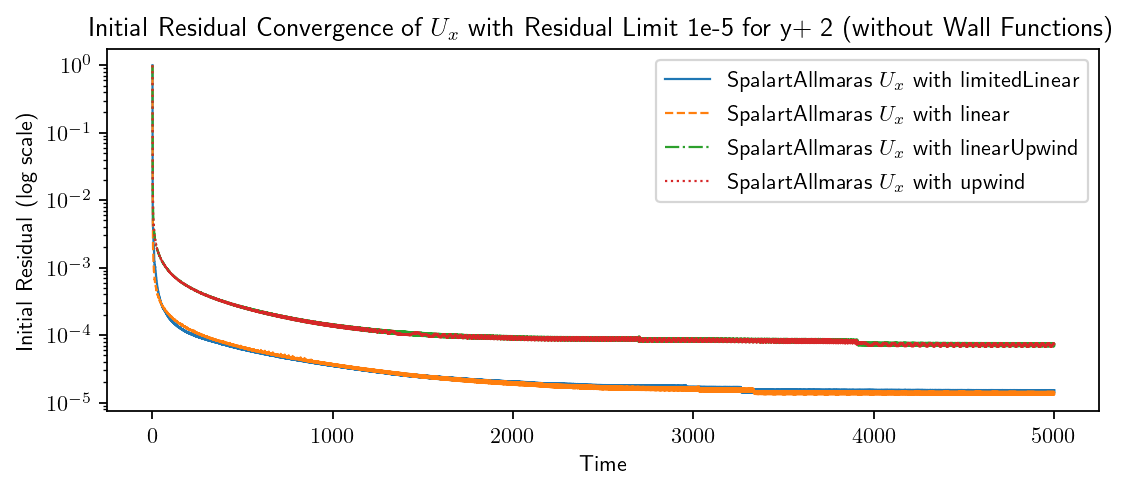

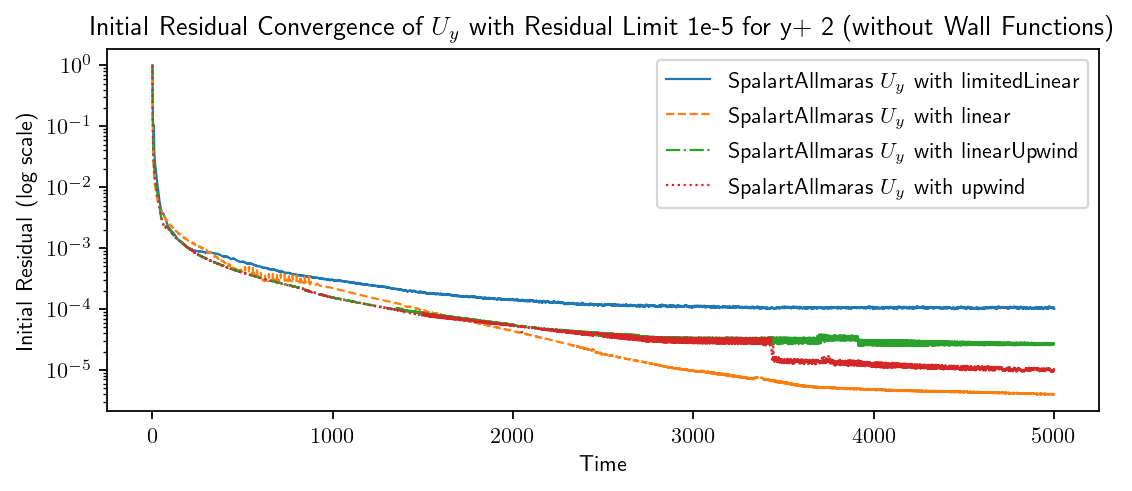

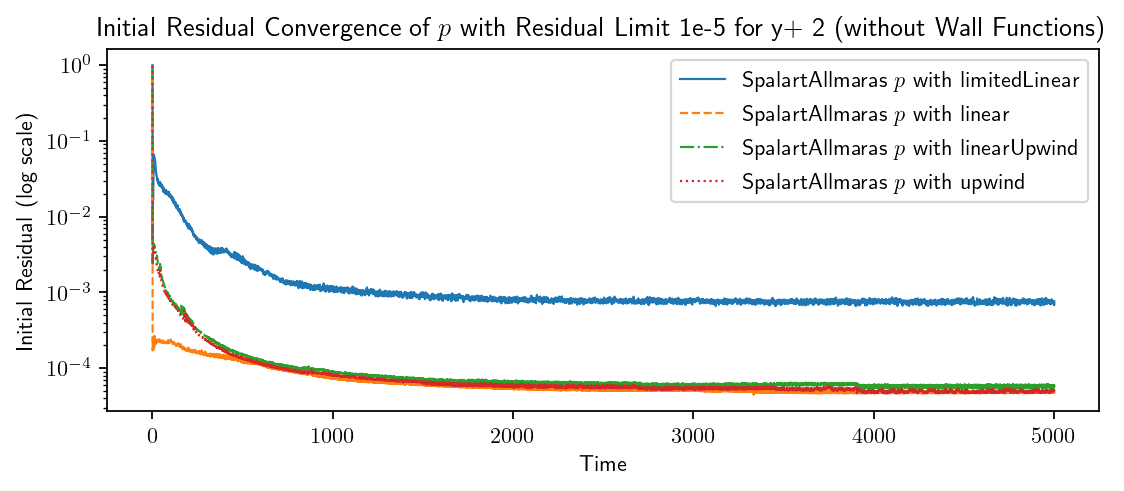

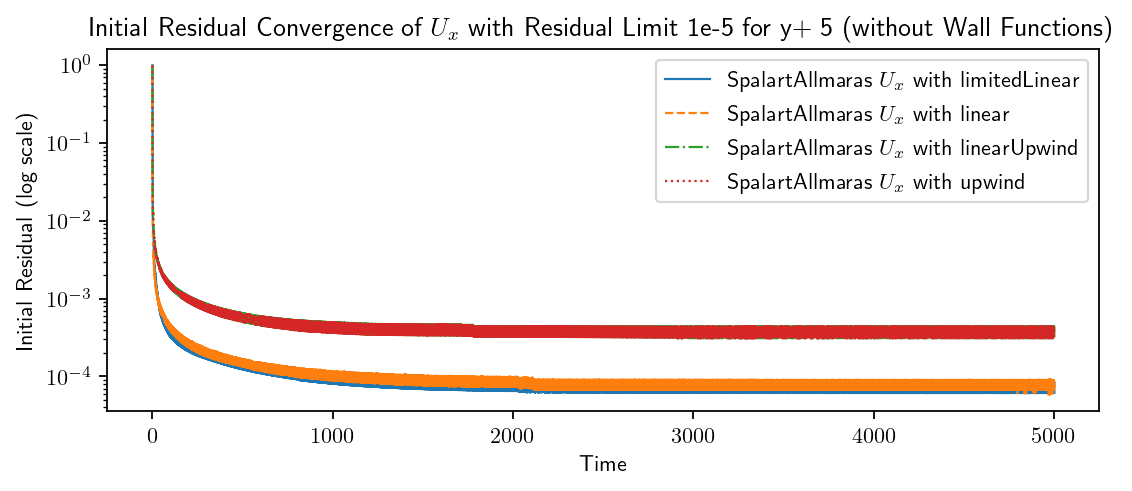

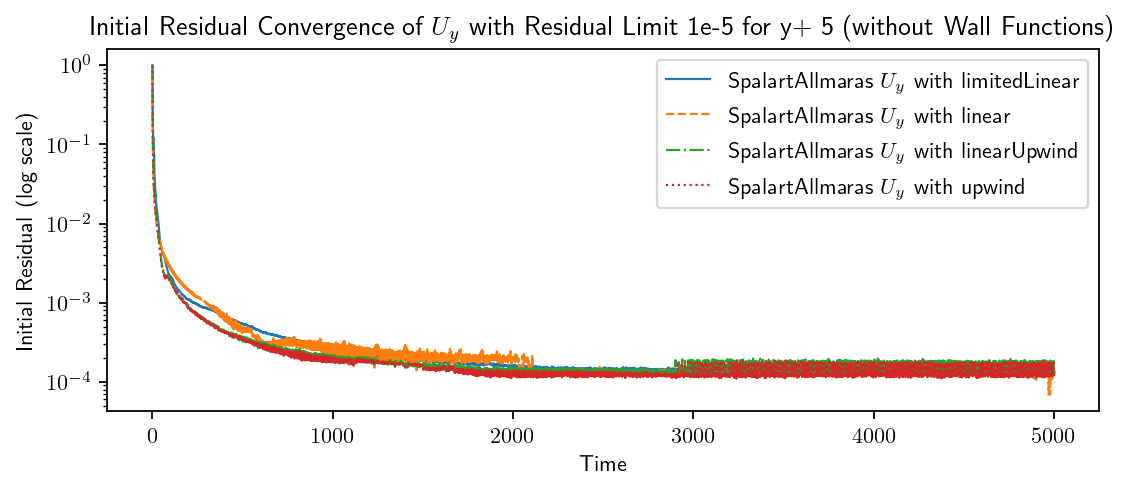

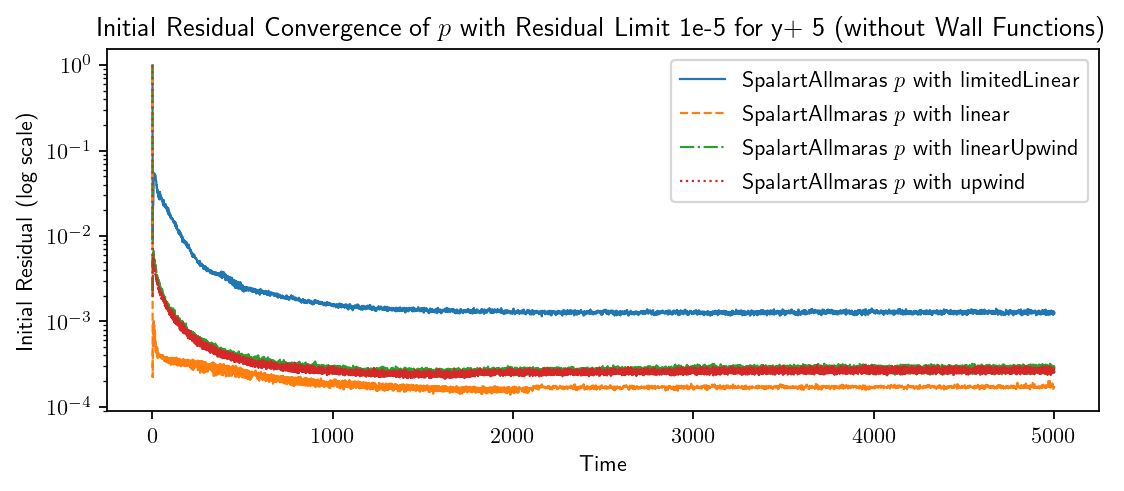

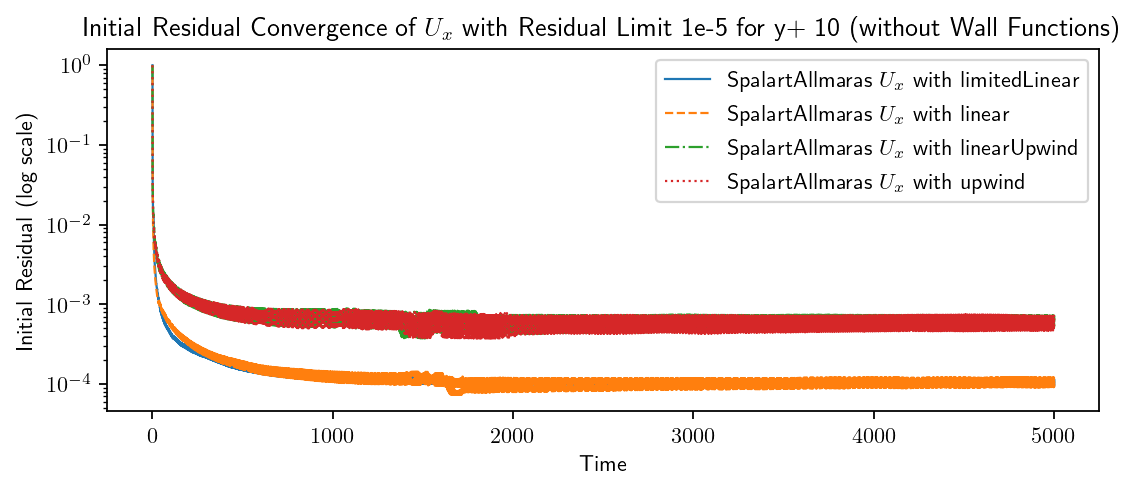

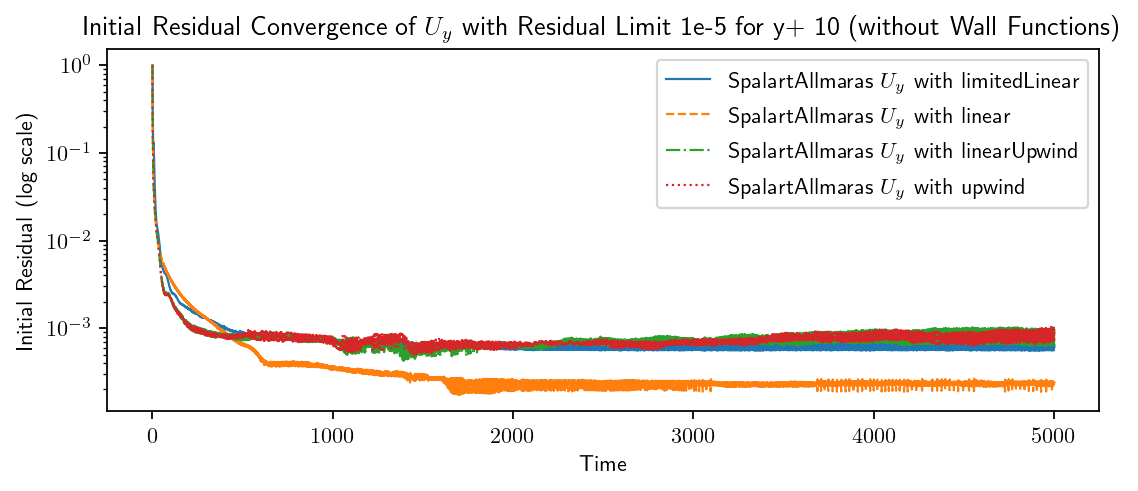

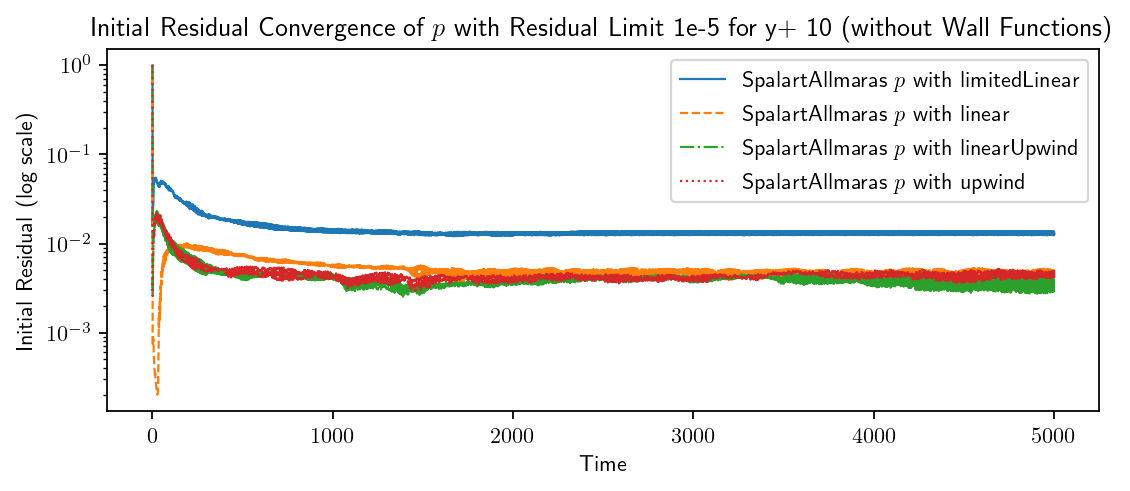

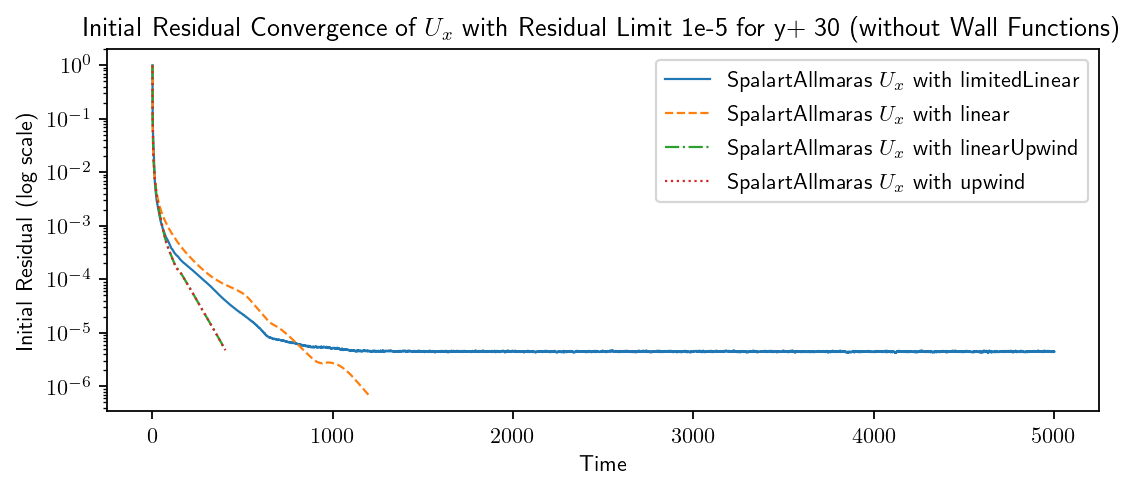

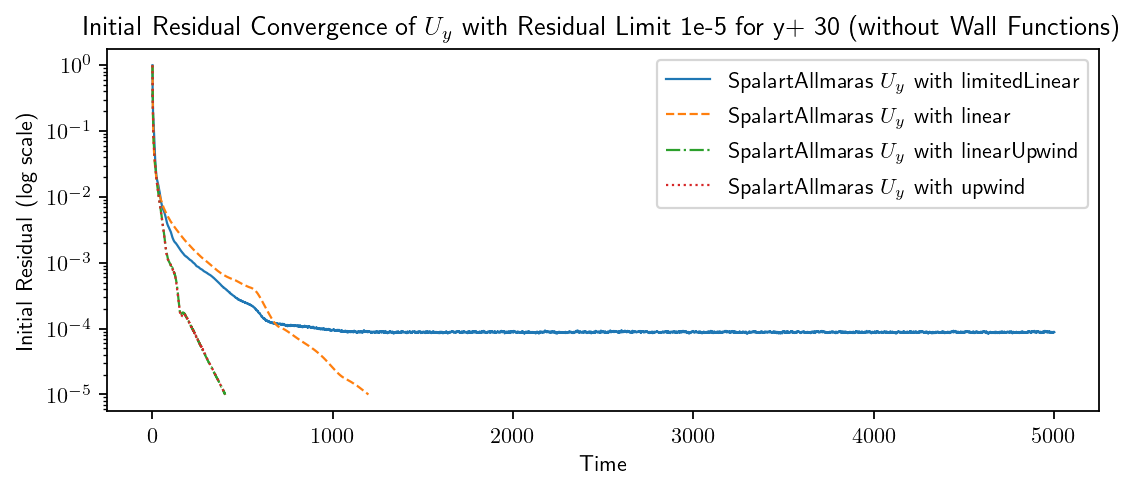

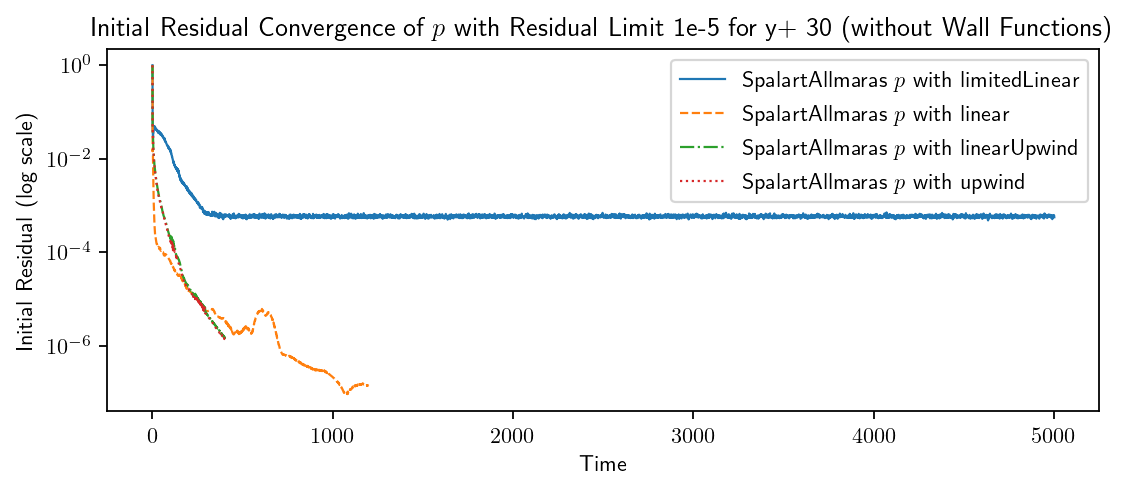

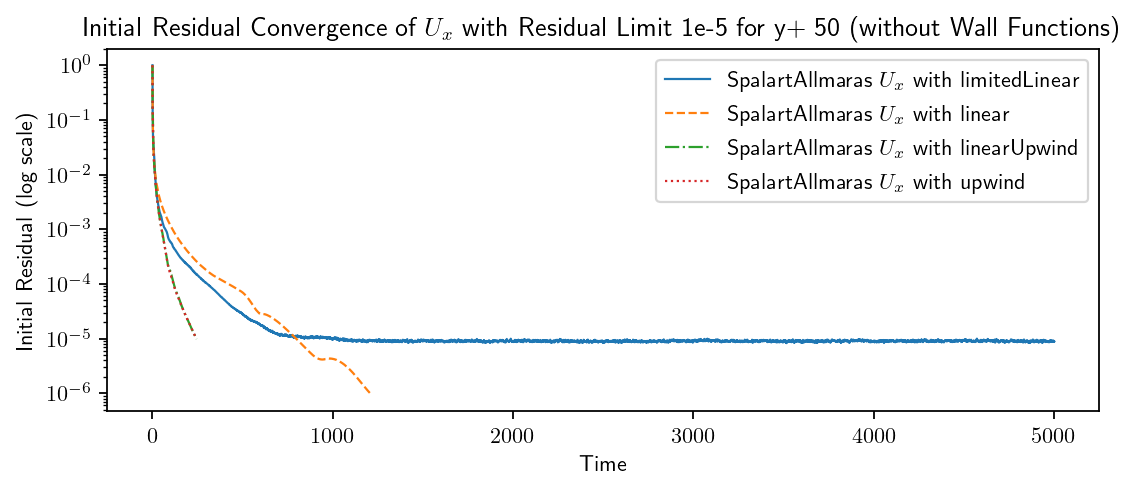

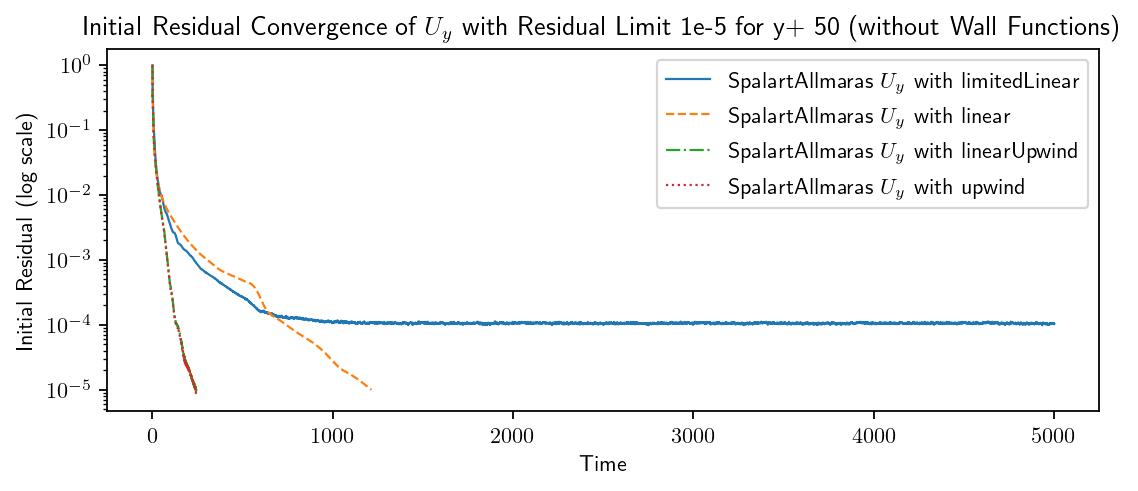

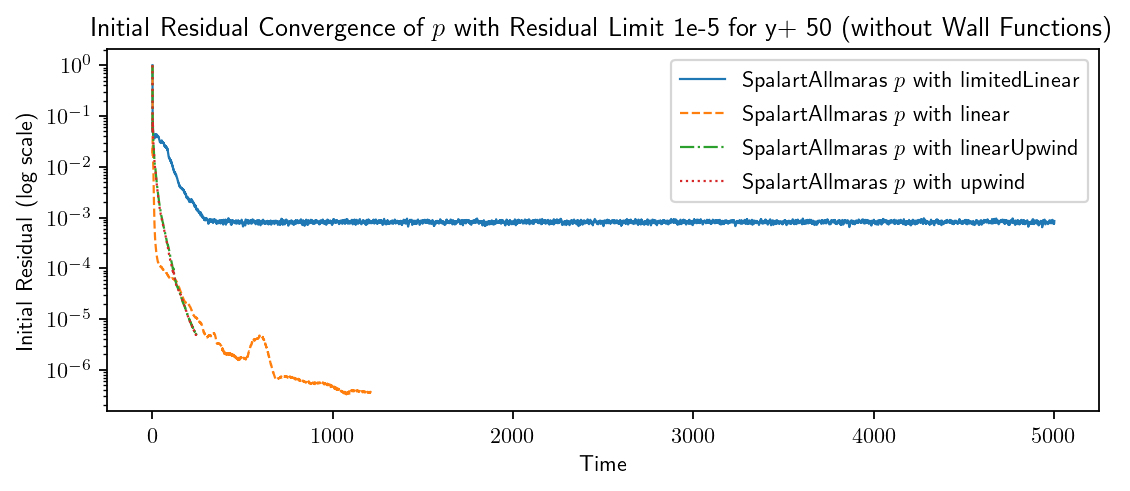

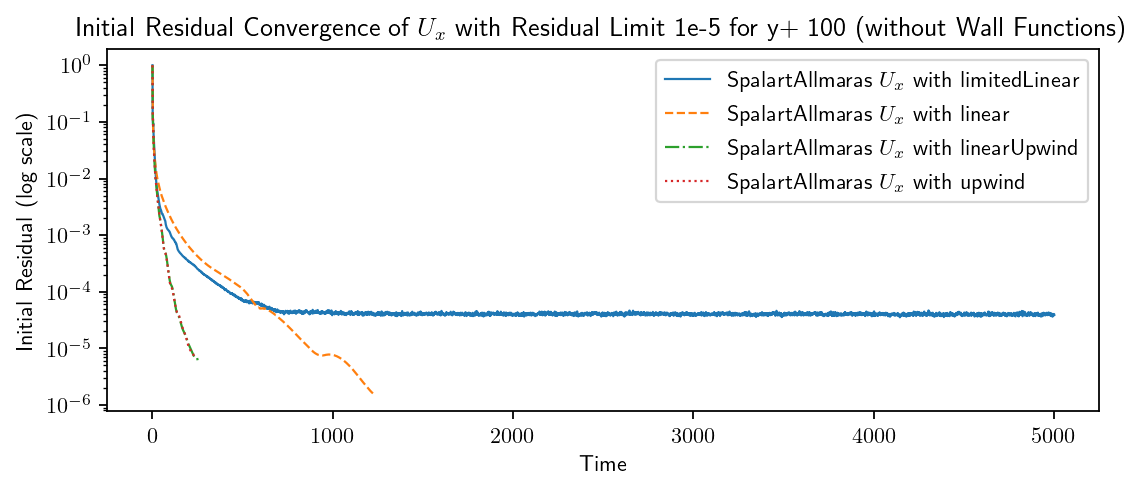

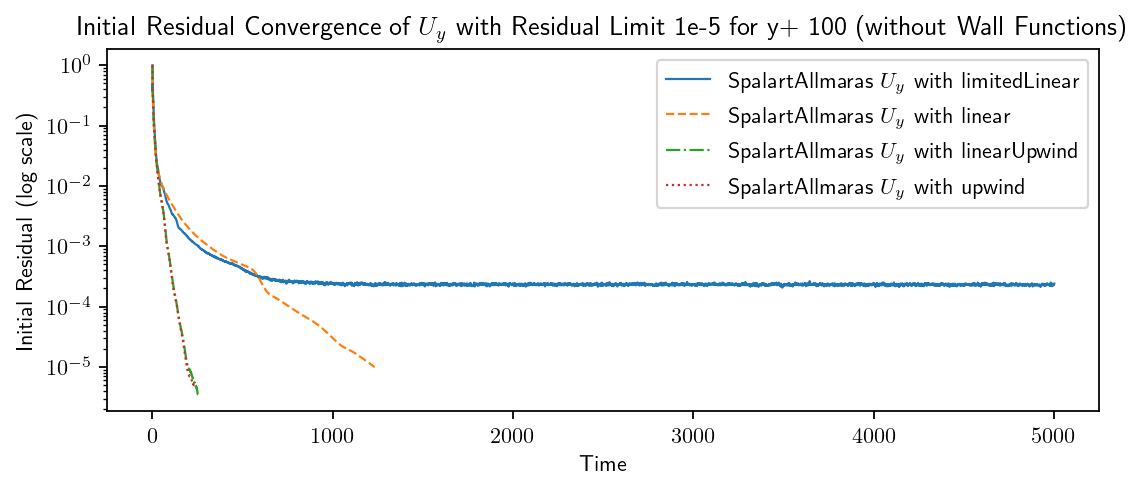

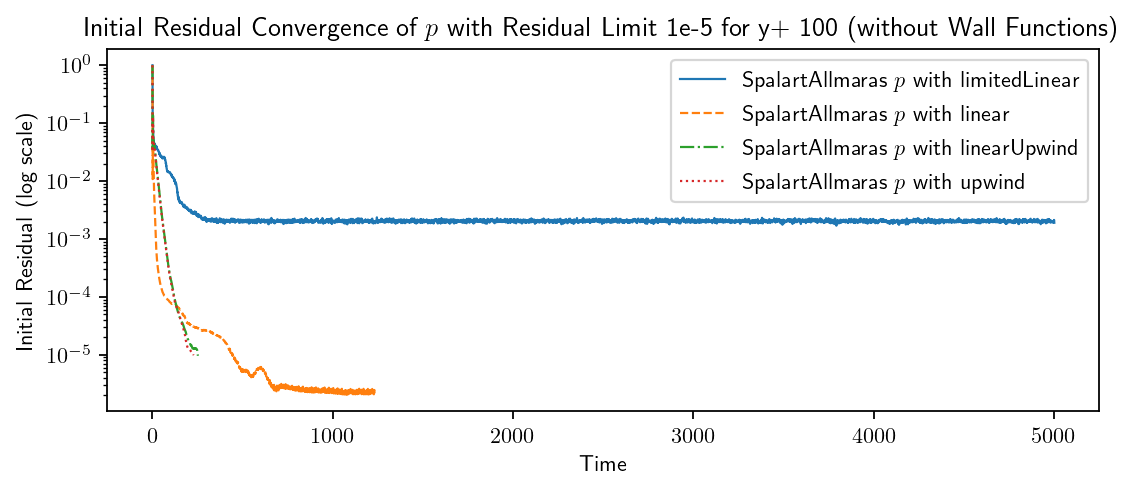

In [8]:
style2 = ["-", "--", "-.", ":"]
lw2 = 1.0
for j in range(len(yp)):
    fig4, ax4 = plt.subplots(1, 1, figsize=(8, 3))
    for i in range(len(divSchemes)):
        plt.yscale("log")
        plt.grid()
        plt.title("Initial Residual Convergence of $U_x$ with Residual Limit 1e-5 for y+ {} (without Wall Functions)".format(yp[j]))
        ax4.set_xlabel("Time")
        ax4.set_ylabel("Initial Residual (log scale)")
        ax4.plot(t_ds_sa[i + len(divSchemes)*j], Ux_init_res_ds_sa[i + len(divSchemes)*j], c = "C{:d}".format(i), ls = style2[i], label = "{} $U_x$ with {}".format(model_sa, divSchemes[i]), lw = lw2)
        ax4.legend()
    plt.savefig(ds + "solverInfo_yp{}_{}_Ux_noWallFunc_divSchemes.pdf".format(yp[j], model_sa), bbox_inches="tight")
    fig5, ax5 = plt.subplots(1, 1, figsize=(8, 3))
    for k in range(len(divSchemes)):
        plt.yscale("log")
        plt.grid()
        plt.title("Initial Residual Convergence of $U_y$ with Residual Limit 1e-5 for y+ {} (without Wall Functions)".format(yp[j]))
        ax5.set_xlabel("Time")
        ax5.set_ylabel("Initial Residual (log scale)")
        ax5.plot(t_ds_sa[k + len(divSchemes)*j], Uy_init_res_ds_sa[k + len(divSchemes)*j], c = "C{:d}".format(k), ls = style2[k], label = "{} $U_y$ with {}".format(model_sa, divSchemes[k]), lw = lw2)
        ax5.legend()
    plt.savefig(ds + "solverInfo_yp{}_{}_Uy_noWallFunc_divSchemes.pdf".format(yp[j], model_sa), bbox_inches="tight")
    fig6, ax6 = plt.subplots(1, 1, figsize=(8, 3))
    for l in range(len(divSchemes)):
        plt.yscale("log")
        plt.grid()
        plt.title("Initial Residual Convergence of $p$ with Residual Limit 1e-5 for y+ {} (without Wall Functions)".format(yp[j]))
        ax6.set_xlabel("Time")
        ax6.set_ylabel("Initial Residual (log scale)")
        ax6.plot(t_ds_sa[l + len(divSchemes)*j], p_init_res_ds_sa[l + len(divSchemes)*j], c = "C{:d}".format(l), ls = style2[l], label = "{} $p$ with {}".format(model_sa, divSchemes[l]), lw = lw2)
        ax6.legend()
    plt.savefig(ds + "solverInfo_yp{}_{}_p_noWallFunc_divSchemes.pdf".format(yp[j], model_sa), bbox_inches="tight")